In [1]:
import pandas as pd
import numpy as np
import os
os.listdir('../data/people')

['sex_age', 'time', '테이블정의서.xlsx', '행정동경계파일']

# 시간별 유동

In [6]:
'''
#성연령유동
path = '../data/people/' + 'time/'
file_list = os.listdir(path)

flow_time = pd.read_csv(path + file_list[0], sep = '|')

for file in file_list[1:] :
    aa = pd.read_csv(path + file, sep = '|')
    print(flow_time.shape)
    flow_time = flow_time.append(aa)
    
flow_time.reset_index(inplace = True, drop = True)
'''

(1080, 28)
(2196, 28)
(3276, 28)
(4392, 28)
(5508, 28)
(6588, 28)
(7704, 28)
(8784, 28)
(9900, 28)
(11016, 28)
(12024, 28)


In [13]:
flow_time = pd.melt(flow_time, id_vars = ['STD_YM','STD_YMD','HDONG_CD','HDONG_NM'], value_vars = [col for col in flow_time.columns if 'TMST' in col])
flow_time.head(3)

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,variable,value
0,201804,20180401,1111051500,청운효자동,TMST_00,609.11
1,201804,20180401,1111053000,사직동,TMST_00,1904.32
2,201804,20180401,1111054000,삼청동,TMST_00,216.30


In [16]:
flow_time.rename(columns = {'variable' : 'time'}, inplace = True)
flow_time.time = flow_time.time.apply(lambda x : int(x[-2:]))

In [24]:
flow_time['HDONG_CD'] = flow_time['HDONG_CD'].apply(str)
flow_time['GU'] = flow_time['HDONG_CD'].apply(lambda x : x[:4]).map({'1111' : '종로구', '1135' : '노원구'})
flow_time['GU'].value_counts()

노원구    166440
종로구    148920
Name: GU, dtype: int64

In [27]:
flow_time['STD_YMD'] = pd.to_datetime(flow_time['STD_YMD'], format = '%Y%m%d')
flow_time['month'] = flow_time.STD_YMD.dt.month
flow_time['day'] = flow_time.STD_YMD.dt.day
flow_time['day_of_week'] = flow_time.STD_YMD.dt.day_name()
flow_time['day_of_week'] = flow_time['day_of_week'].map({'Monday' : 0, 'Tuesday' : 1, 'Wednesday' : 2, 'Thursday' : 3,
                                                    'Friday' : 4, 'Saturday' : 5, 'Sunday' : 6})

In [33]:
#flow_time.to_csv(path + 'flow_time.csv', index = False, encoding = 'utf-8')

In [35]:
jongno = flow_time[flow_time.GU == '종로구'].reset_index(drop = True)
nowon = flow_time[flow_time.GU == '노원구'].reset_index(drop = True)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [39]:
jongno.day_of_week.value_counts()

6    21624
5    21216
4    21216
3    21216
2    21216
1    21216
0    21216
Name: day_of_week, dtype: int64

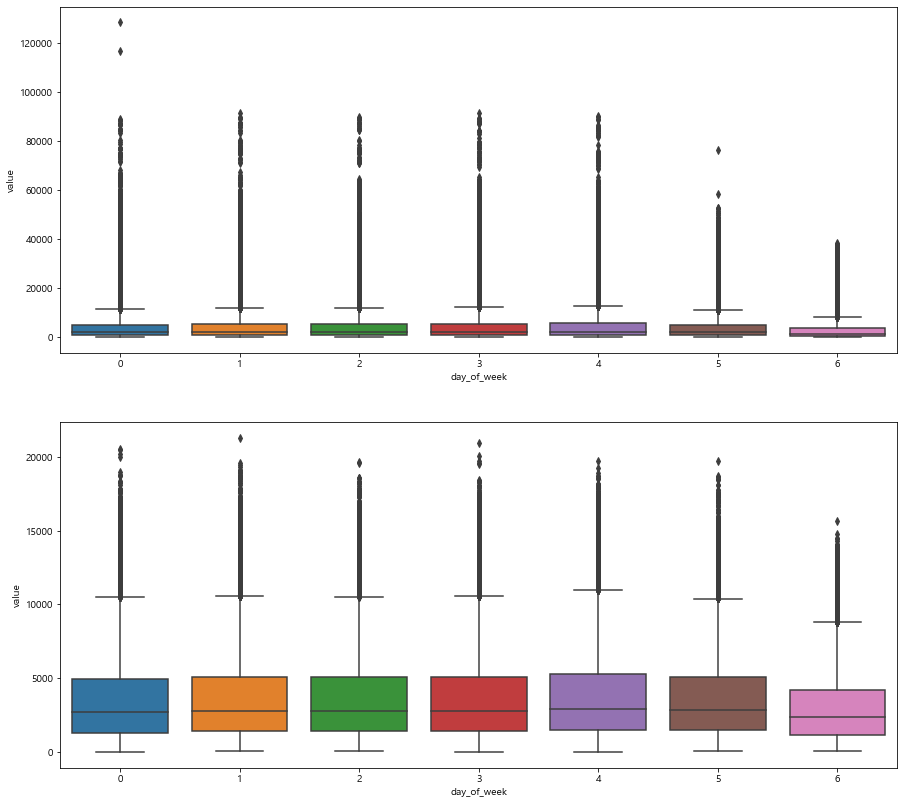

In [44]:
fig, axs = plt.subplots(nrows = 2, figsize = (15,14))
sns.boxplot(x="day_of_week", y="value",data = jongno, ax = axs[0])
sns.boxplot(x="day_of_week", y="value",data = nowon, ax = axs[1])
plt.show()

In [48]:
jongno.head(3)

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,time,value,GU,month,day,day_of_week
0,201804,2018-04-01,1111051500,청운효자동,0,609.11,종로구,4,1,6
1,201804,2018-04-01,1111053000,사직동,0,1904.32,종로구,4,1,6
2,201804,2018-04-01,1111054000,삼청동,0,216.30,종로구,4,1,6


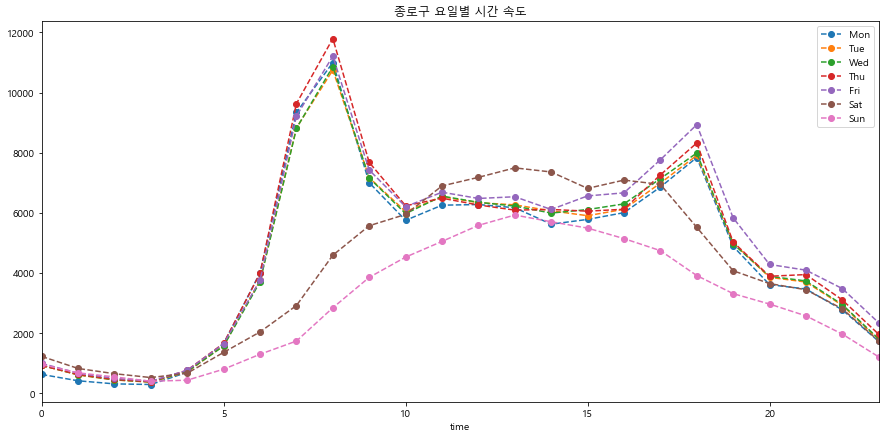

In [60]:
#요일별, 시간대별 평균 속도
days_time = pd.DataFrame(jongno.groupby(['day_of_week','time'])['value'].mean())
days_time = days_time.unstack()
days_time.columns = np.arange(24)

fig,ax = plt.subplots(figsize=(15,7))
days_time.loc[0, :].plot(label = 'Mon',ls="--",marker="o")
days_time.loc[1, :].plot(label = 'Tue',ls="--",marker="o")
days_time.loc[2, :].plot(label = 'Wed',ls="--",marker="o")
days_time.loc[3, :].plot(label = 'Thu',ls="--",marker="o")
days_time.loc[4, :].plot(label = 'Fri',ls="--",marker="o")
days_time.loc[5, :].plot(label = 'Sat',ls="--",marker="o")
days_time.loc[6, :].plot(label = 'Sun',ls="--",marker="o")

plt.xlabel('time')
plt.legend()
plt.title('종로구 요일별 시간 속도')
plt.show()

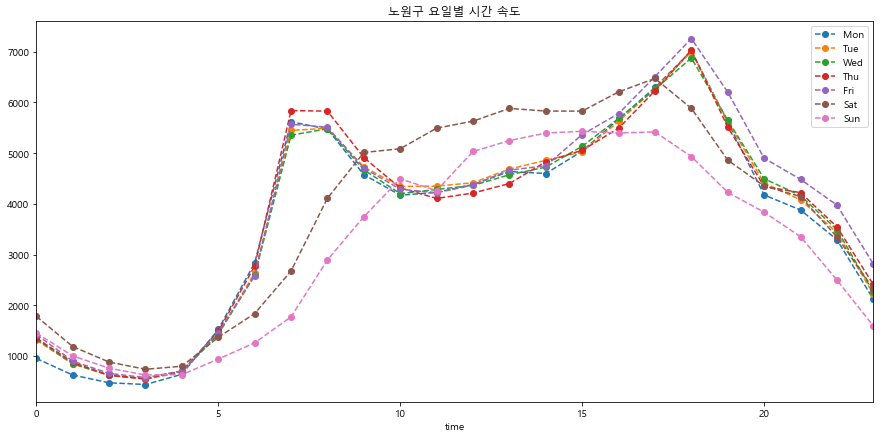

In [62]:
#요일별, 시간대별 평균 속도
days_time = pd.DataFrame(nowon.groupby(['day_of_week','time'])['value'].mean())
days_time = days_time.unstack()
days_time.columns = np.arange(24)

fig,ax = plt.subplots(figsize=(15,7))
days_time.loc[0, :].plot(label = 'Mon',ls="--",marker="o")
days_time.loc[1, :].plot(label = 'Tue',ls="--",marker="o")
days_time.loc[2, :].plot(label = 'Wed',ls="--",marker="o")
days_time.loc[3, :].plot(label = 'Thu',ls="--",marker="o")
days_time.loc[4, :].plot(label = 'Fri',ls="--",marker="o")
days_time.loc[5, :].plot(label = 'Sat',ls="--",marker="o")
days_time.loc[6, :].plot(label = 'Sun',ls="--",marker="o")

plt.xlabel('time')
plt.legend()
plt.title('노원구 요일별 시간 속도')
plt.show()

In [34]:
flow_time.head()

,STD_YM,STD_YMD,HDONG_CD,HDONG_NM,time,value,GU,month,day,day_of_week
0,201804,2018-04-01,1111051500,청운효자동,0,609.11,종로구,4,1,6
1,201804,2018-04-01,1111053000,사직동,0,1904.32,종로구,4,1,6
2,201804,2018-04-01,1111054000,삼청동,0,216.30,종로구,4,1,6
3,201804,2018-04-01,1111055000,부암동,0,1300.61,종로구,4,1,6
4,201804,2018-04-01,1111056000,평창동,0,2523.88,종로구,4,1,6
